In [1]:
# Basic imports
import os
master_dir = os.getcwd()  # the main working directory
data_dir   = os.path.join(master_dir, "Data")  # sub directory where we save data files
import csv
import time
import numpy as np
import pandas as pd
import scipy.io
import pickle
from typing import Callable, Any
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (10, 5)

# Approximating a sine wave

In [4]:
# Import the data for comparison
df   = pd.read_csv(os.path.join(data_dir, "sine_200.csv"))
df_n = pd.read_csv(os.path.join(data_dir, "sine_noise_200.csv"))
# Show an example
df.head(3)

,Algorithm,Iterations,Training Time,Mean Squared Error
0,traingd,200,0.201905,0.436548
1,traingd,200,0.237501,0.714459
2,traingd,200,0.213354,0.741361


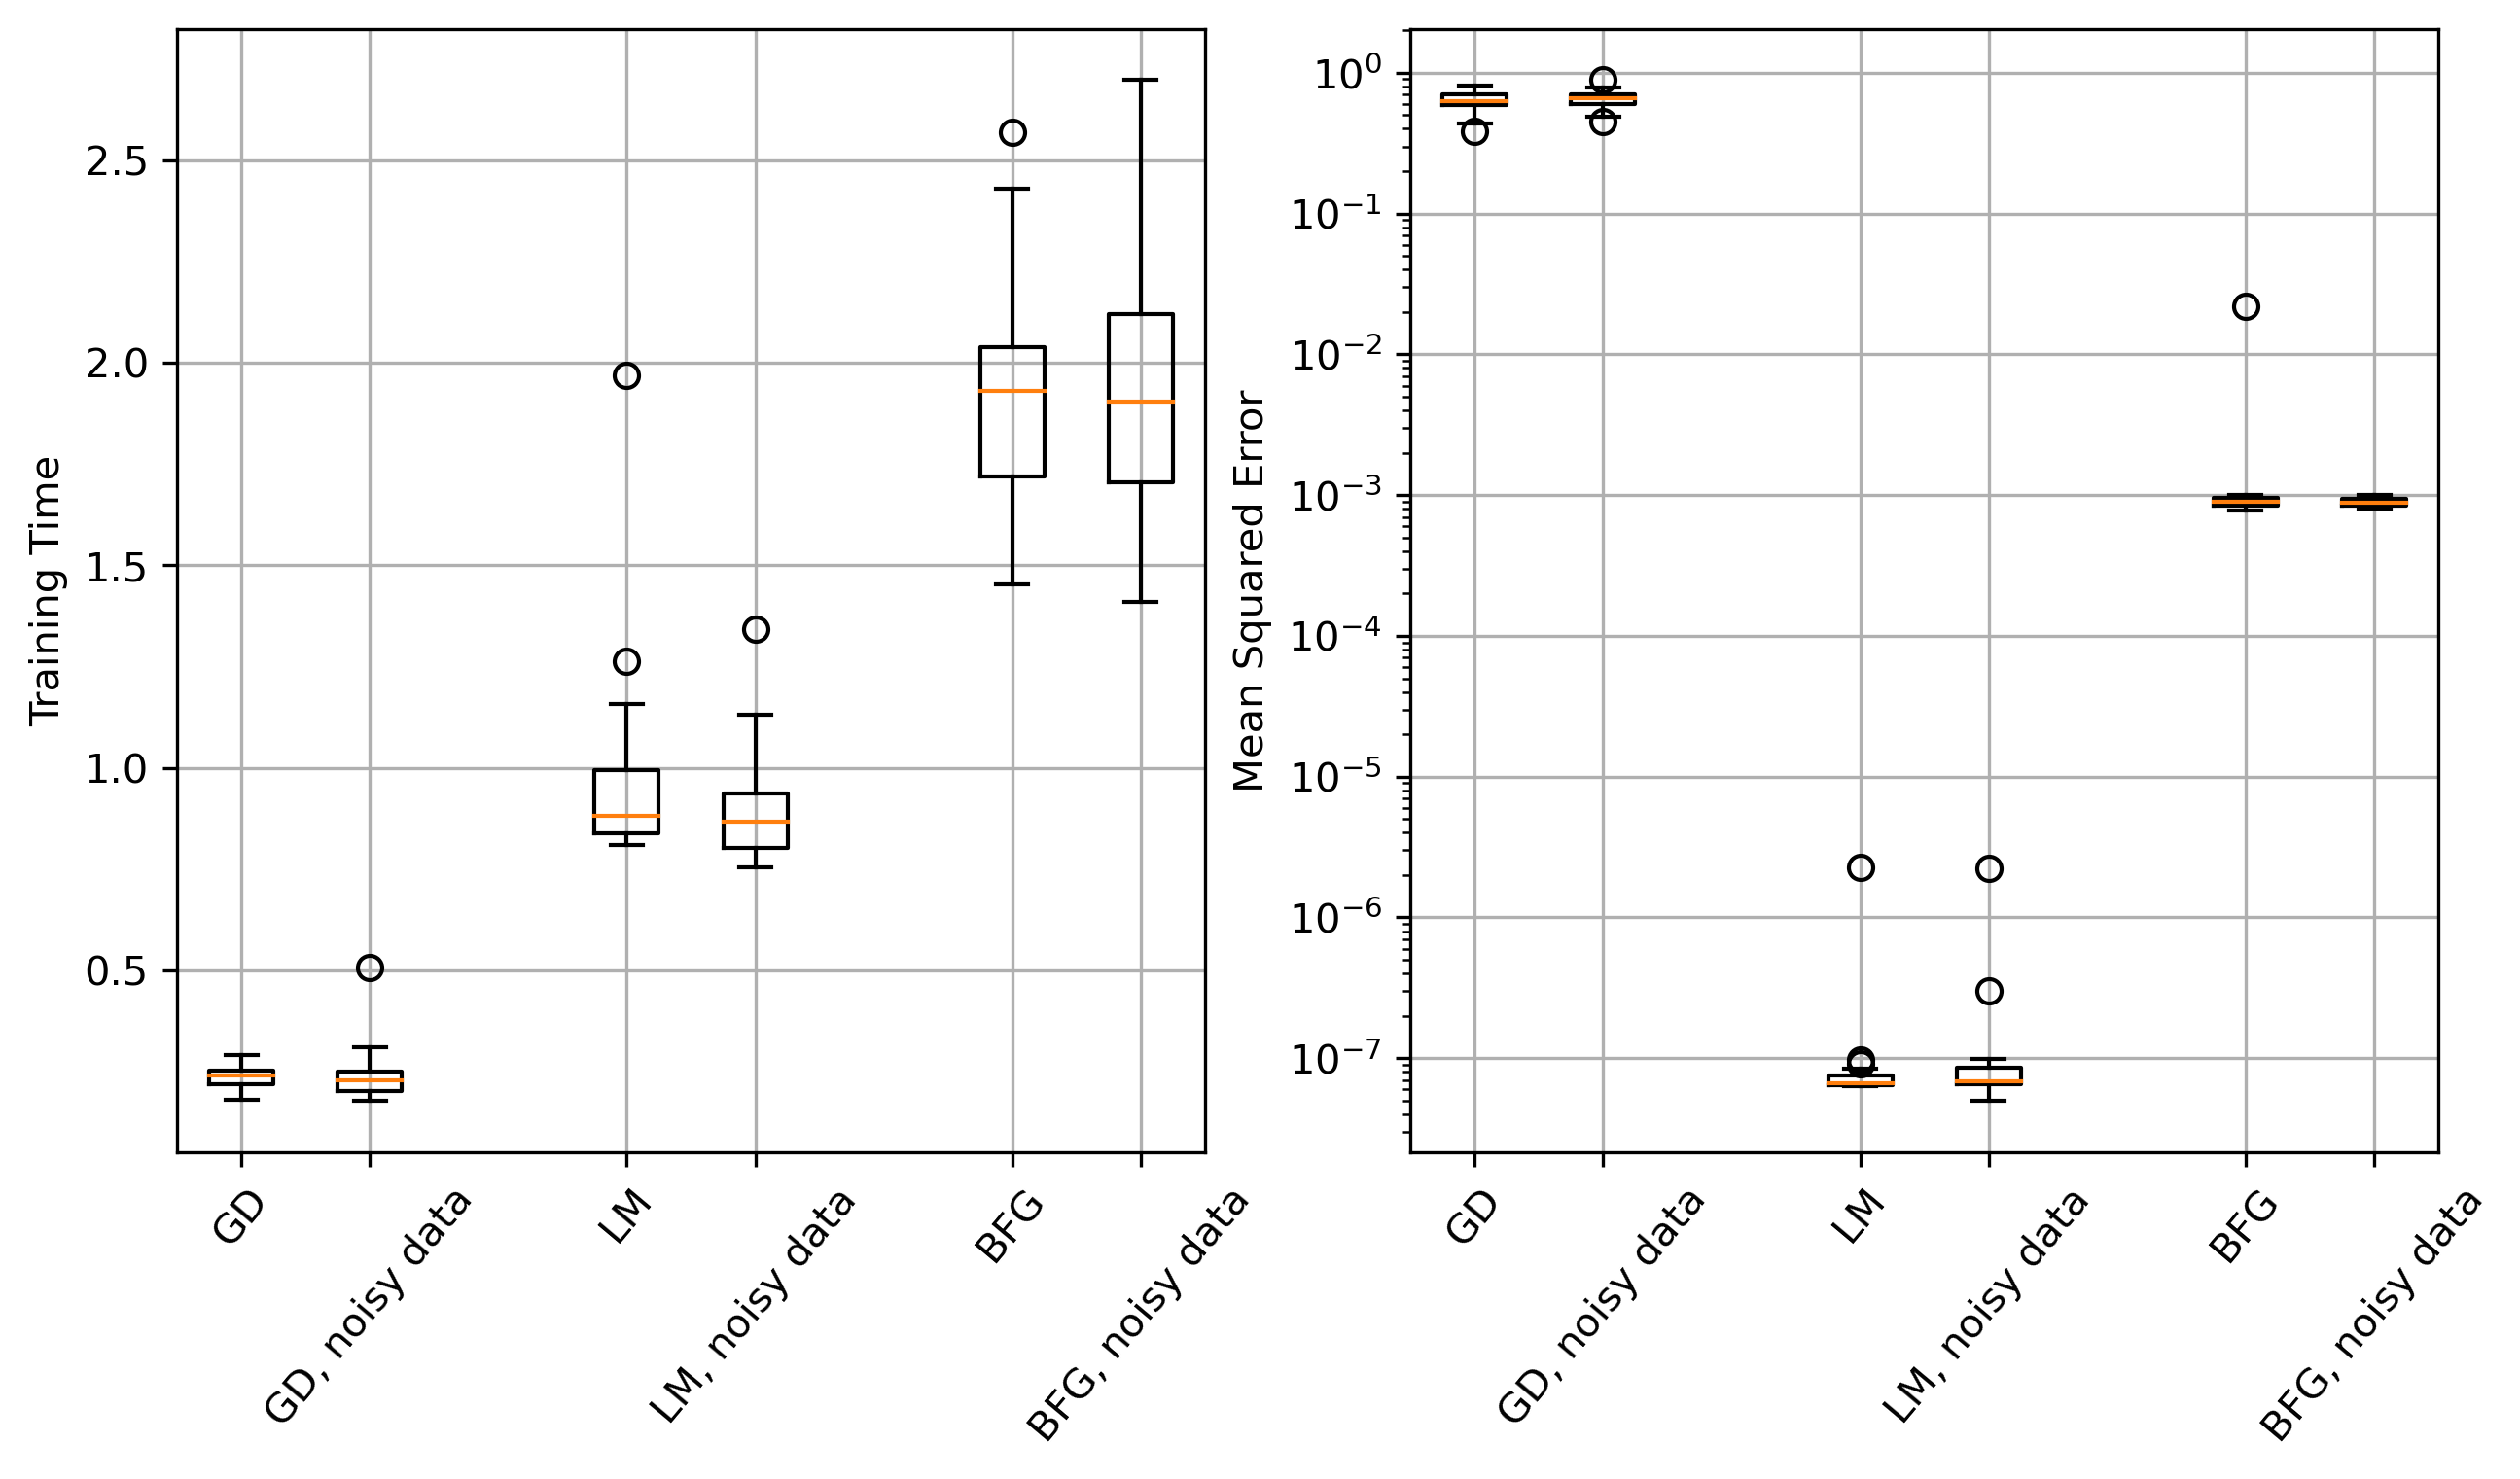

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharex=True)

# Define the plot parameters for the loop
keys = ["Training Time", "Mean Squared Error"]
xlabels = ['GD', 'GD, noisy data', 'LM', 'LM, noisy data', 'BFG', 'BFG, noisy data']

for i, key in enumerate(keys):
    ax = axs[i]
    # Save data of each algorithm and for both pure and noisy data
    data1 = df[df["Algorithm"]     == "traingd"][key]
    data2 = df_n[df_n["Algorithm"] == "traingd"][key]
    
    data3 = df[df["Algorithm"]     == "trainlm"][key]
    data4 = df_n[df_n["Algorithm"] == "trainlm"][key]
    
    data5 = df[df["Algorithm"]     == "trainbfg"][key]
    data6 = df_n[df_n["Algorithm"] == "trainbfg"][key]
    
    # Make a boxplot
    ax.boxplot([data1, data2, data3, data4, data5, data6], positions=[1, 2, 4, 5, 7, 8])
    # Set the x-axis tick labels and the axis label
    ax.set_xticks([1, 2, 4, 5, 7, 8], xlabels)
    ax.set_xticklabels(xlabels, rotation = 50)

    # Set the y-axis label
    ax.set_ylabel(key)
    ax.grid()
    # Use log scale for MSE
    if i == 1:
        ax.set_yscale('log')
        
plt.show()

# Personal regression problem

In [9]:
# Read in data and save appropriate variables
df   = pd.read_csv(os.path.join(data_dir, "my_data.csv"), names=["X1", "X2", "Tnew"])
X1   = df["X1"]
X2   = df["X2"]
Tnew = df["Tnew"]

# Archive

In [ ]:
# fig, axs = plt.subplots(2, 2, figsize=(10,5), sharex=True, sharey=True)
# # Define the plot parameters for the loop
# keys = ["Training Time", "Training Time", "Mean Squared Error", "Mean Squared Error"]
# titles = ["Sine, no noise", "Sine, noise", "Sine, no noise", "Sine, no noise"]
# csv_files = ["training_results_sine.csv", "training_results_sine_noise.csv", "training_results_sine.csv", "training_results_sine_noise.csv"]

# for i in range(len(axs)):
#     ax = axs[i//2, i%2]
#     # Read in the data
#     df = pd.read_csv(os.path.join(data_dir, csv_files[i]))
#     # Save data of each algorithm
#     traingd_data  = df[df["Algorithm"] == "traingd"]
#     trainlm_data  = df[df["Algorithm"] == "trainlm"]
#     trainbfg_data = df[df["Algorithm"] == "trainbfg"]
#     # Get data
#     data1 = traingd_data[keys[i]]
#     data2 = trainlm_data[keys[i]]
#     data3 = trainbfg_data[keys[i]]
#     # Make a boxplot
#     ax.boxplot([data1, data2, data3], positions=[1, 2, 3])
#     # Set the x-axis tick labels and the axis label
#     ax.set_xticks([1, 2, 3], ['GD', 'LM', 'BFG'])

#     # Set the y-axis label
#     ax.set_ylabel('Training time')
#     ax.grid()
#     ax.set_title(titles[i])
# plt.show()